<a href="https://colab.research.google.com/github/Zhdanko-Gleb/Seaborn/blob/master/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 Note that all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood), but the Seaborn API is much more convenient.


##lmplot

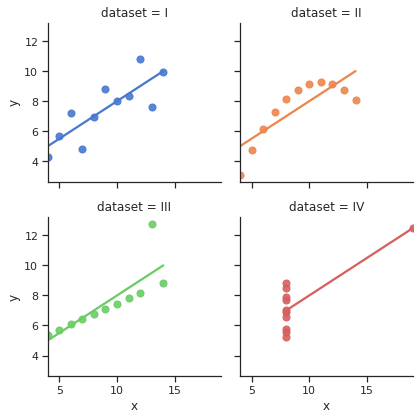

In [2]:
sns.set(style = 'ticks')
data = sns.load_dataset('anscombe')
sns.lmplot(x='x',y='y',col = 'dataset',hue='dataset',data = data,
           col_wrap = 2, ci = None, palette = 'muted',height = 3,
           scatter_kws = {'s':50,'alpha':0.9})

##lineplot

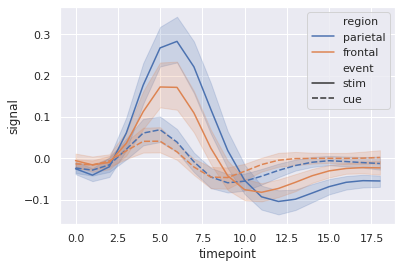

In [3]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

##relplot

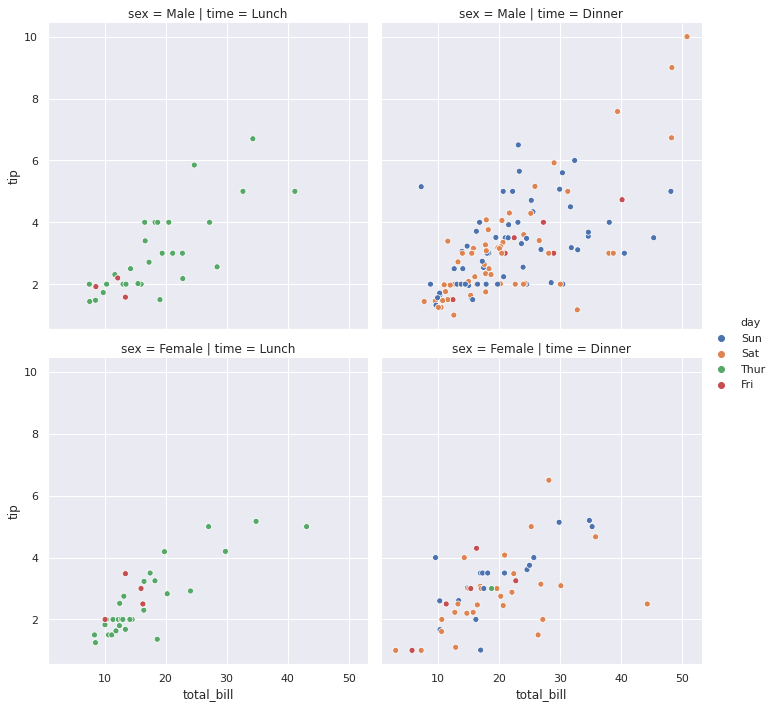

In [4]:
tips = sns.load_dataset('tips')
sns.relplot(x='total_bill',y = 'tip',hue='day',
            col = 'time',row = 'sex',data = tips)

##Histograms, KDE, and densities

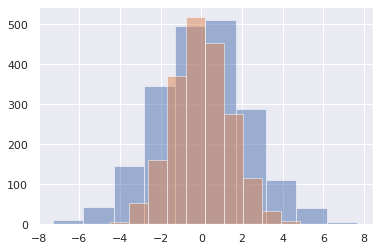

In [5]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000) 
data = pd.DataFrame(data,columns=['x','y'])
for col in 'xy':
    plt.hist(data[col],alpha=0.5)

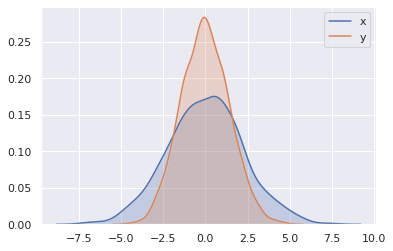

In [6]:
for col in 'xy':
    sns.kdeplot(data[col],shade=True)

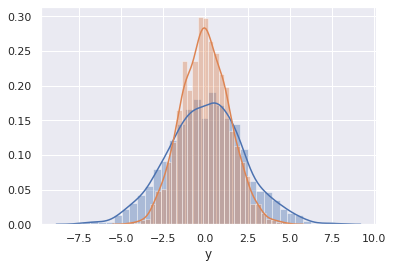

In [7]:
sns.distplot(data['x'])
sns.distplot(data['y']);

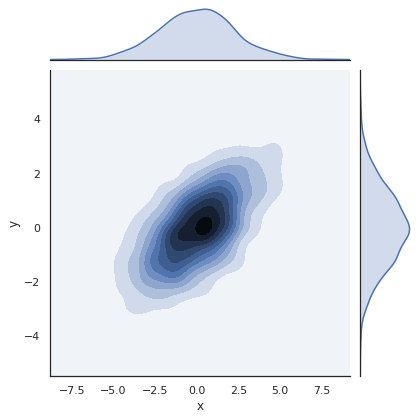

In [8]:
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='kde');

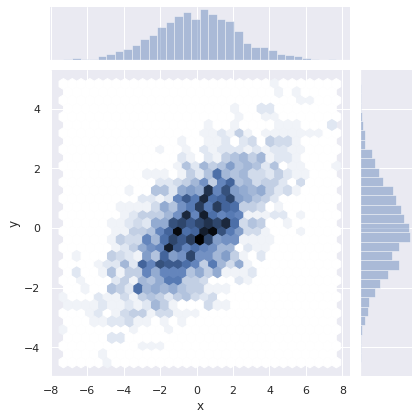

In [9]:
sns.jointplot('x','y',data,kind='hex');

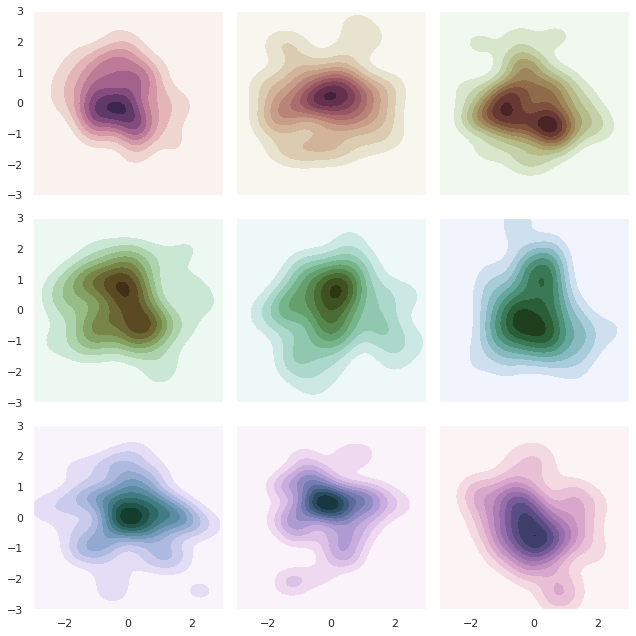

In [10]:
sns.set(style="dark")
rs = np.random.RandomState(77)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

##Pair plots 

In [11]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


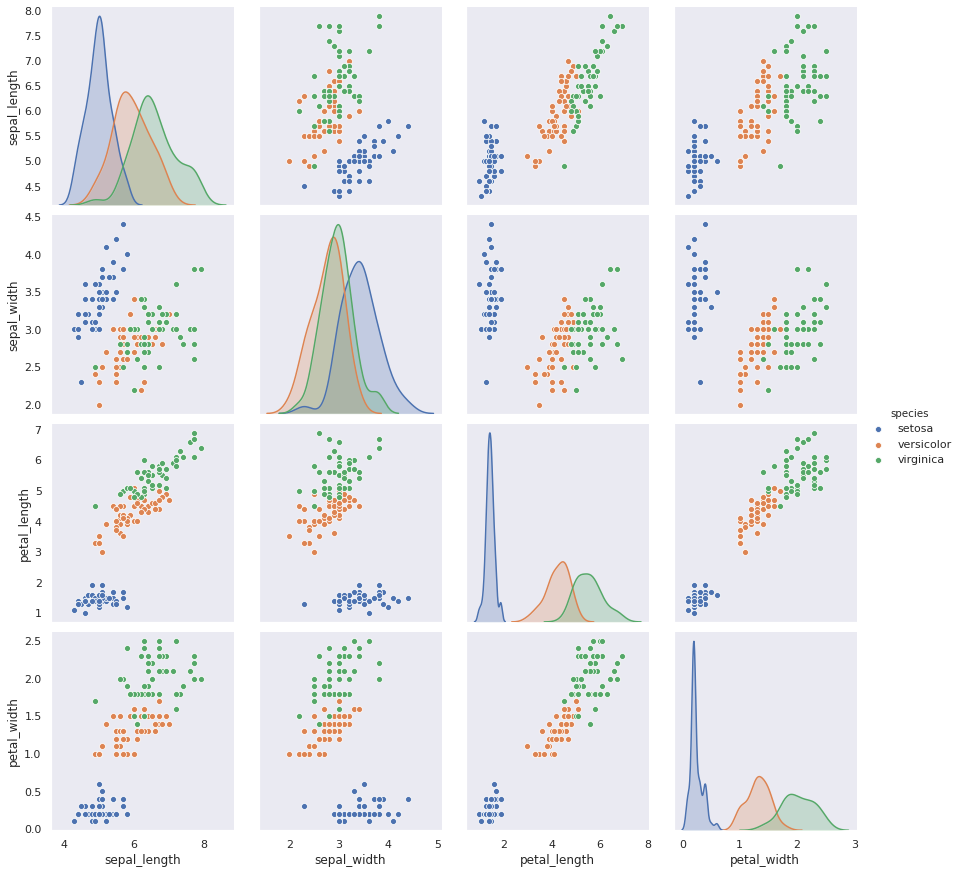

In [12]:
sns.pairplot(iris,hue='species',height=3);

##Faceted histograms 

In [13]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
tips['tip_pct'] = 100*tips.tip/tips.total_bill

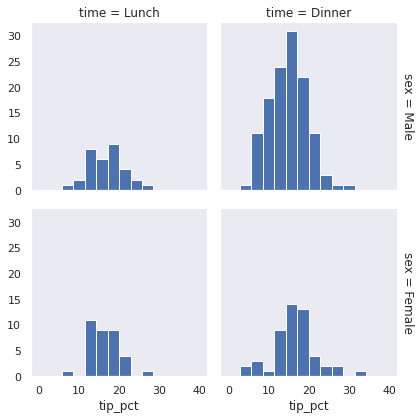

In [15]:
grid = sns.FacetGrid(tips,row='sex',col='time',margin_titles=True)
grid.map(plt.hist,'tip_pct',bins=np.linspace(0,40,15));

##Joint Distributions

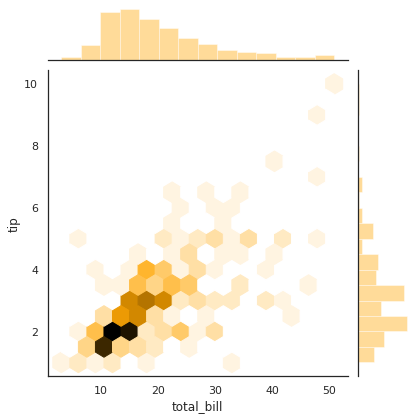

In [16]:
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips,kind='hex',color='orange')

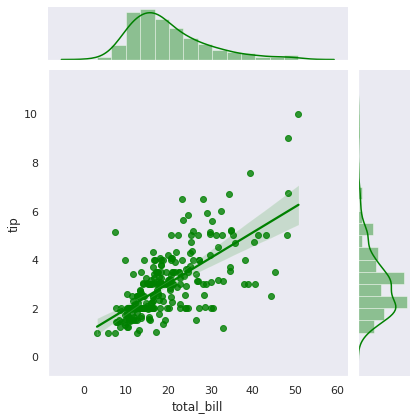

In [17]:
sns.jointplot('total_bill','tip',data=tips,kind='reg',color='green');

In [18]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


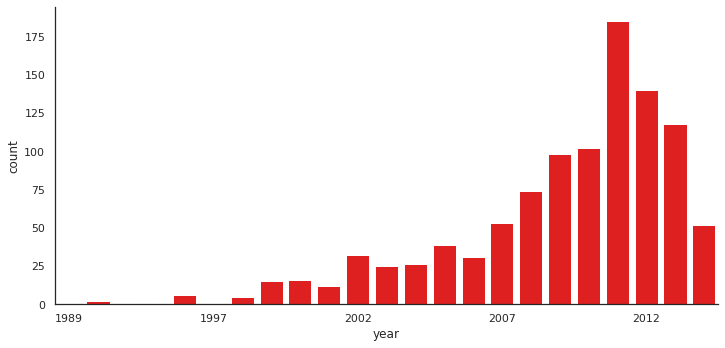

In [19]:
with sns.axes_style('white'):
    f = sns.catplot('year',data= planets,aspect=2,kind='count',color='red')
    f.set_xticklabels(step=5)

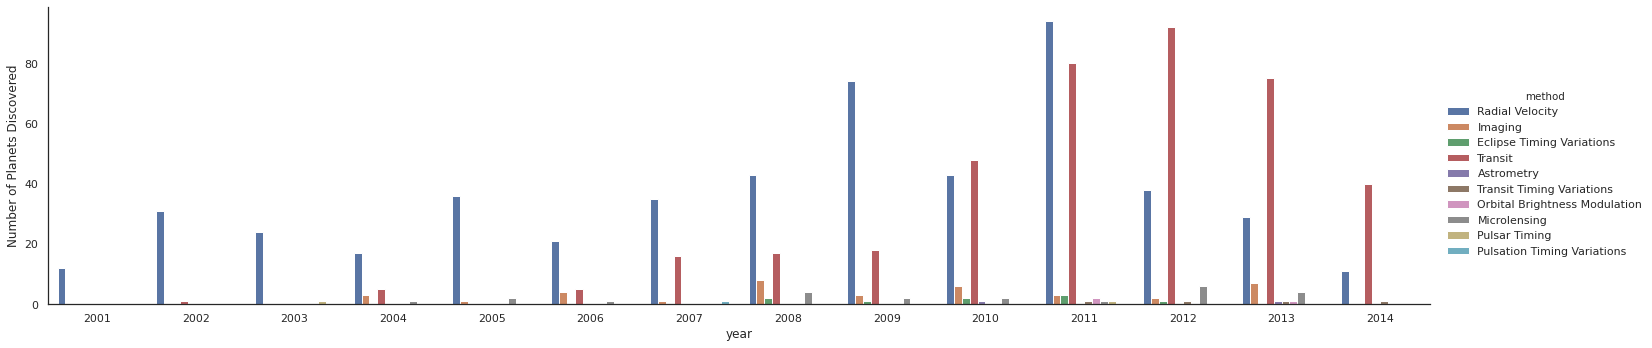

In [20]:
with sns.axes_style('white'):
    f = sns.catplot('year',data = planets,aspect=4.0,kind='count',
                    hue = 'method',order = range(2001,2015))
    f.set_ylabels('Number of Planets Discovered')

##Factor plots

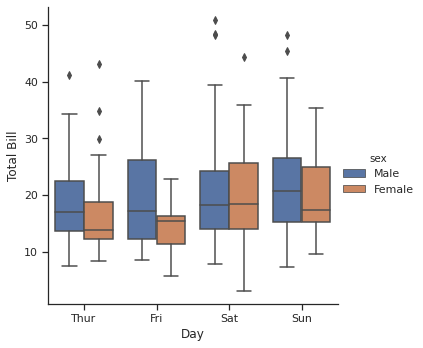

In [21]:
with sns.axes_style(style='ticks'):
    f = sns.catplot('day', 'total_bill','sex',data=tips,kind='box')
    f.set_axis_labels('Day','Total Bill');

##FacetGrid

         r     slow    medium      fast
0  0.00000  0.00000  0.000000  0.000000
1  0.10101  0.10101  0.202020  0.404040
2  0.20202  0.20202  0.404040  0.808081
3  0.30303  0.30303  0.606061  1.212121
4  0.40404  0.40404  0.808081  1.616162
         r speed    theta
0  0.00000  slow  0.00000
1  0.10101  slow  0.10101
2  0.20202  slow  0.20202
3  0.30303  slow  0.30303
4  0.40404  slow  0.40404


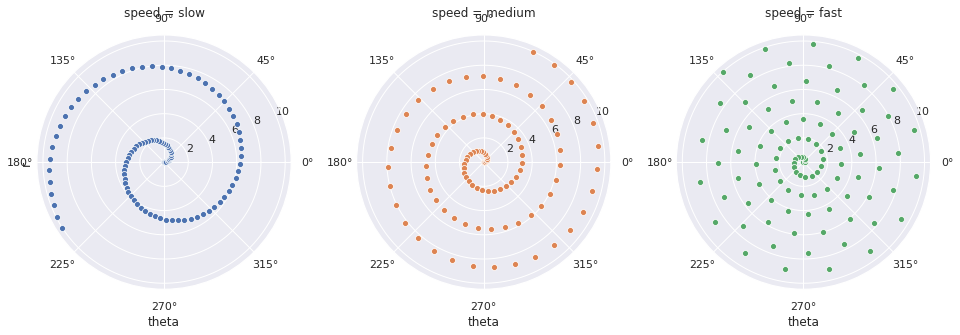

In [22]:
# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})
print(df.head())
# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')
print(df.head())
# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")

##barplot

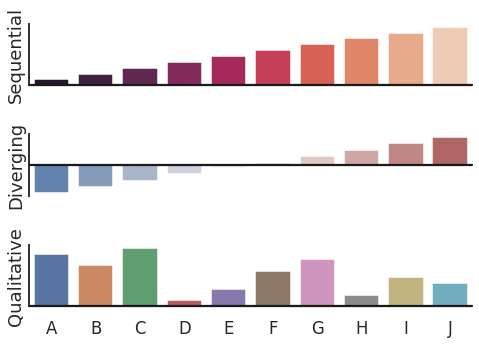

In [23]:
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

##heatmap

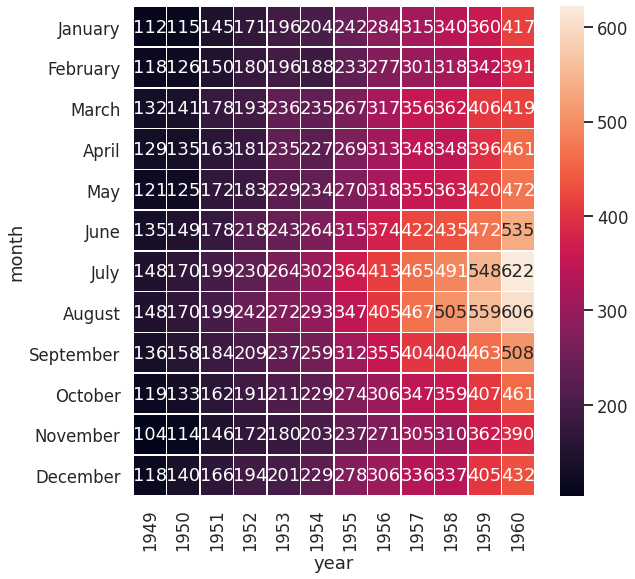

In [24]:
data = sns.load_dataset('flights')
data = data.pivot('month','year','passengers')
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(data,annot=True,fmt='d',linewidths=.5,ax=ax)

##boxenplot

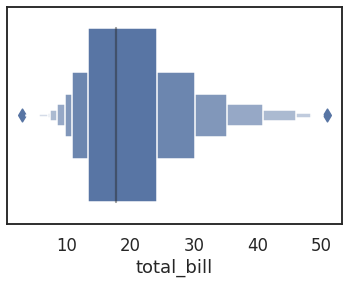

In [25]:
tips = sns.load_dataset("tips")
ax = sns.boxenplot(x=tips["total_bill"])

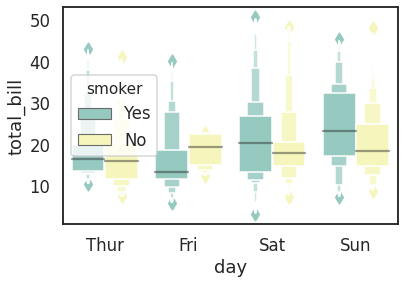

In [26]:
ax = sns.boxenplot(x="day", y="total_bill", hue="smoker",
                   data=tips, palette="Set3")

##swarmplot

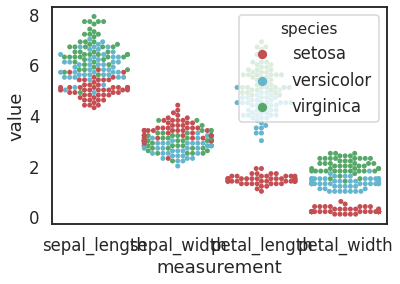

In [27]:
iris = sns.load_dataset('iris')
iris = pd.melt(iris,'species',var_name = 'measurement')
sns.swarmplot(x = 'measurement',y = 'value',hue = 'species',
              palette=['r','c','g'],data = iris)

##violinplot

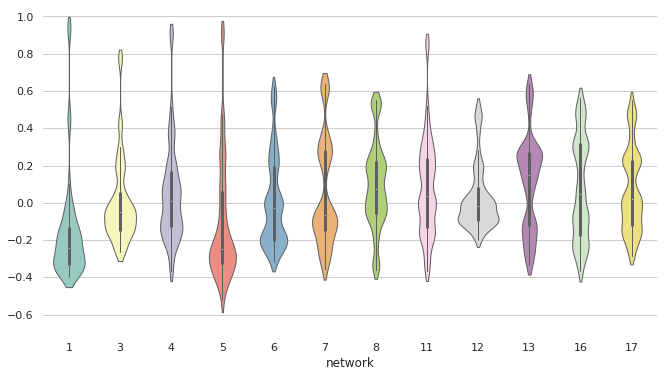

In [28]:
sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

## Exploring Marathon Finishing Times 

In [29]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [30]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [31]:
import datetime
def convert_time(a):
    h,m,s = map(int,a.split(':'))
    return datetime.timedelta(hours=h,minutes=m,seconds=s)
data = pd.read_csv('marathon-data.csv',
                   converters = {'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [32]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [33]:
data['split_sec'] = data['split'].astype(int)/1e9
data['final_sec'] = data['final'].astype(int)/1e9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


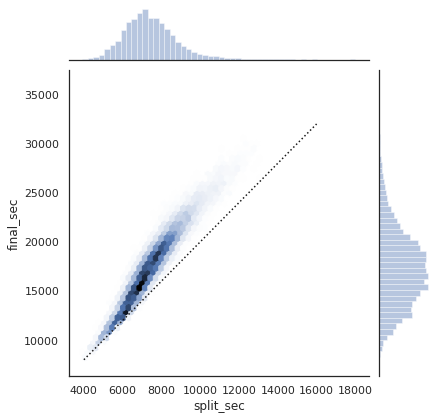

In [34]:
with sns.axes_style('white'):
    f = sns.jointplot('split_sec','final_sec',data,kind='hex')
    f.ax_joint.plot(np.linspace(4000,16000),
                   np.linspace(8000,32000),':k')

In [35]:
data['split_frac'] = 1-2*data['split_sec']/data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


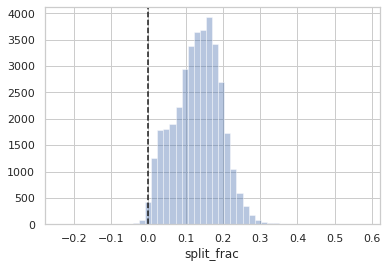

In [36]:
sns.distplot(data['split_frac'],kde=False);
plt.axvline(0,color='k',linestyle='--');

In [37]:
np.sum(data.split_frac<0)

251

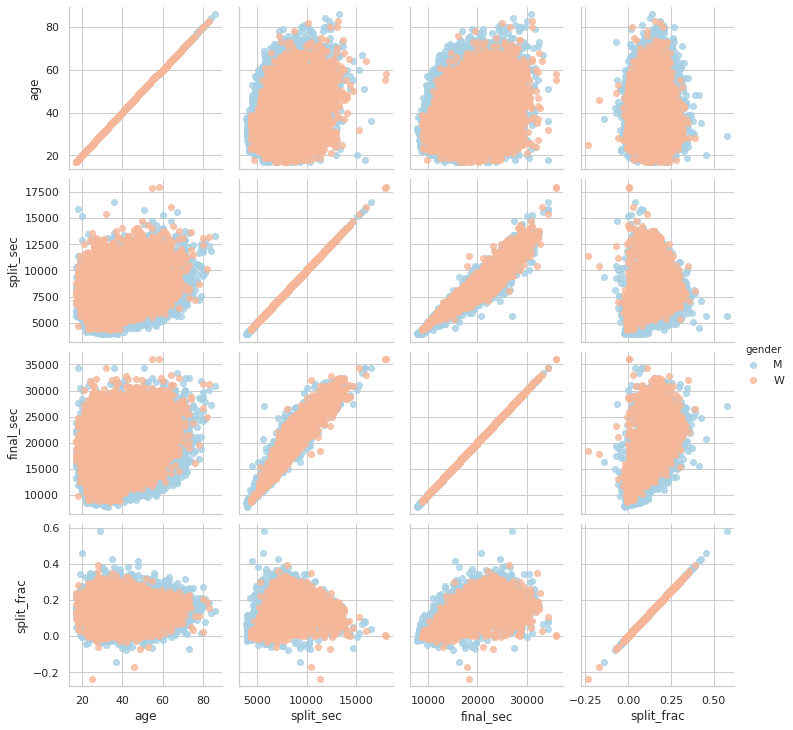

In [38]:
f = sns.PairGrid(data,vars=['age','split_sec','final_sec','split_frac'],
                 hue='gender',palette='RdBu_r')
f.map(plt.scatter,alpha=0.8)
f.add_legend();

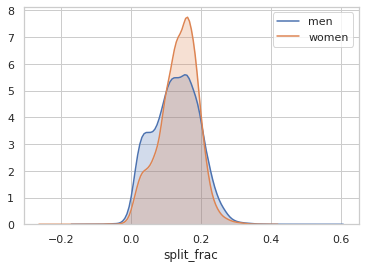

In [39]:
sns.kdeplot(data.split_frac[data.gender=='M'],label='men',shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'],label='women',shade=True)
plt.xlabel('split_frac');

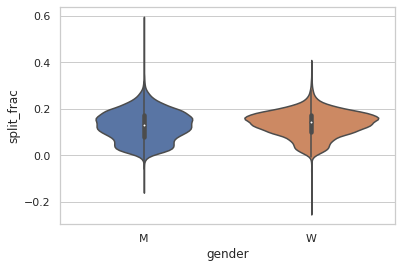

In [40]:
sns.violinplot('gender','split_frac',data=data);

In [41]:
data['dec'] = data.age.map(lambda age: 10*(age//10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


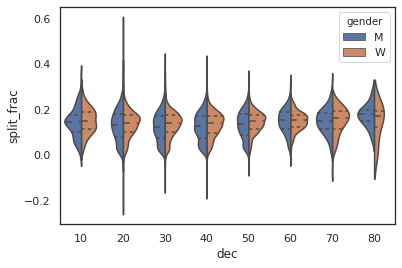

In [42]:
with sns.axes_style('white'):
    sns.violinplot('dec','split_frac',hue='gender',data=data,
                   split= True,inner='quartile')

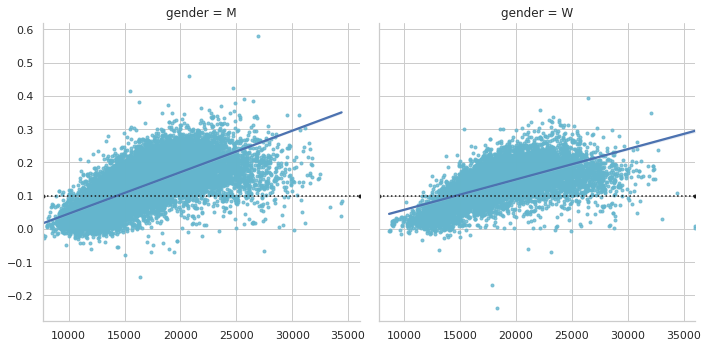

In [43]:
f = sns.lmplot('final_sec','split_frac',col='gender',data=data,
               markers = '.', scatter_kws = dict(color='c'))
f.map(plt.axhline,y=0.1,color='k',ls=':');